In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install sweetviz

In [ ]:
df = pd.read_csv('train.csv')
df_40 = df[(df['Age']>=40) & (df['Age']<=49)]

In [ ]:
import sweetviz as sv

my_report = sv.analyze(df_40, feat_cfg = sv.FeatureConfig(skip=['id', 'CustomerId', 'Surname']), target_feat='Exited')
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


- Balance & Geography 상관계수 0.57
- Balance & NumOfProducts 상관계수 0.35
- Balance & Exited 상관계수 0.12
- NumOfProducts & Exited 상관계수 0.17
- NumOfProducts: 1, 2가 97%

- 40대 이탈률
  - Germany(53%), France(29%), Spain(29%)
  - Female(43%), Male(27%)
  - Age
    - 40(22%), 49(58%)
    - 많을수록 높아지는 추세이지만, 많을수록 표본이 적어서 왜곡될 가능성
  - Balance가 0일 때, 이탈률이 가장 낮음(20% 후반)
  - NumOfProducts - 1(50%), 2(11%), 3(92%), 4(89%)
  - HasCrCard - 0(35%), 1(35%) 동일
  - IsActiveMember - 0(46%), 1(21%)


In [ ]:
my_report_2 = sv.compare(df, df_40, feat_cfg = sv.FeatureConfig(skip=['id', 'CustomerId', 'Surname']), target_feat='Exited')
my_report_2.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 원본 데이터로 인사이트를 얻어보자

In [ ]:
origin = pd.read_csv('Churn_Modelling.csv')

In [ ]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [ ]:
origin.dropna(inplace=True)

In [ ]:
origin.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1


In [ ]:
origin.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9998.000000,9.998000e+03,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,5003.497499,1.569094e+07,650.529606,38.920287,5.013003,76481.490819,1.530206,0.705541,0.514803,100099.786455,0.203841
std,2886.321275,7.192399e+04,96.633003,10.487986,2.892152,62393.187035,0.581669,0.455822,0.499806,57510.939962,0.402872
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2504.250000,1.562854e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5003.500000,1.569073e+07,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100218.210000,0.000000
75%,7502.750000,1.575323e+07,718.000000,44.000000,7.000000,127641.417500,2.000000,1.000000,1.000000,149395.882500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
origin.duplicated().sum()

2

In [ ]:
origin.drop_duplicates(inplace=True)

원본 sweetviz
- Balance=0(36%) (딥러닝된 데이터는 절반 정도였음)
- Balance=0인 사람의 이탈률이 14% (전체는 20%)
- NumOfProducts 1,2가 97% 차지, 3(266명, 83%), 4(60명, 100%)의 이탈률이 매우 높음

In [ ]:
import sweetviz as sv

my_report_3 = sv.analyze(origin, feat_cfg = sv.FeatureConfig(skip=['RowNumber', 'CustomerId', 'Surname']), target_feat='Exited')
my_report_3.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
origin[origin['Balance']==0]['Exited'].mean()

0.13827433628318583

원본 데이터와 Exited=1인 데이터 비교
- Germany의 32%가 이탈
- 5~60대의 이탈률이 매우 높음
- 이탈한 사람 중 64%가 NotActiveMember

In [ ]:
df_exit = origin[origin['Exited']==1]
my_report_4 = sv.compare(origin, df_exit, feat_cfg = sv.FeatureConfig(skip=['RowNumber', 'CustomerId', 'Surname', 'Exited']))
my_report_4.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


원본 데이터와 Balance=0인 데이터 비교
- Germany 중 Balance=0인 사람 없음, France와 Spain은 절반 정도 Balance=0
- NumOfProducts=1 중 Balance=0인 사람 17%
- NumOfProducts=2 중 Balance=0인 사람 57%
- 이탈률: 원본(20%), Balance=0(14%)

In [ ]:
df_bal_0 = origin[origin['Balance']==0.0]
my_report_5 = sv.compare(origin, df_bal_0, feat_cfg = sv.FeatureConfig(skip=['RowNumber', 'CustomerId', 'Surname', 'Balance']))
my_report_5.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


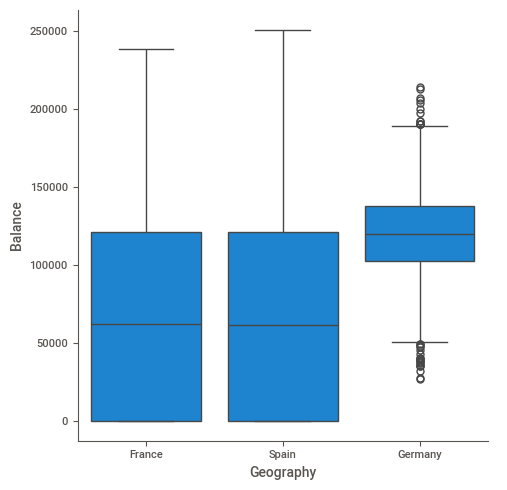

In [ ]:
sns.catplot(x='Geography', y='Balance', kind='box', data=origin)

### 결론

1. Balance=0일 때 이탈률이 높다고 예상할 수 있지만, 오히려 이탈률이 낮은 이유?
- 계좌만 개설하고 활동중이지 않아서 그런가 생각했지만 -> 아님 ㅜㅜ
  - ActiveMember에 대한 정확한 정의가 뭘까?
  - 잔액이 0인데 어떻게 ActiveMember일 수 있지?
  - 데이터 생성 시점 기준 과거 특정 기간동안 활동했으면 ActiveMember인가?

In [ ]:
origin[origin['Balance']==0]['IsActiveMember'].mean()

0.5176991150442478

2. Germany의 이탈률이 높은 이유?
- Germany 중 Balance가 0인 사람이 극소수여서
  - Balance>0이 Exited=1을 불러온 것...?

3. NumOfProducts와 Exited의 관계
- 1,2(10% 미만)일수록 이탈률이 적고, 3,4(둘다 90% 언저리)의 이탈률이 매우 높다
  - 3,4의 이탈률이 높은 건 표본의 개수가 적어서(전체의 5% 미만)
  - 2의 이탈률이 매우 낮은 이유는 찾지 못했음 ㅠㅠ


4. 원본 데이터에서 신기했던 점
- Germany 중 Balance=0인 사람이 없음
- NumOfProducts 4인 사람의 이탈률 100% (이지만 전체의 1% 미만 사람들 ㅎㅎ)
- NumOfProducts=1 중 Balance=0인 사람 17% -> Exited 28%
- NumOfProducts=2 중 Balance=0인 사람 57% -> Exited 7%